In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [12]:
base = pd.concat([
    pd.read_csv("free_recall_baseline_alex.csv"),
    pd.read_csv("free_recall_baseline_carla.csv"),
    pd.read_csv("free_recall_baseline_bertram.csv"),
]).reset_index()

fast = pd.concat([
    pd.read_csv("free_recall_fast_05_alex.csv"),
    pd.read_csv("free_recall_fast_05_carla.csv"),
    pd.read_csv("free_recall_fast_bertram.csv"),
]).reset_index()

slow = pd.concat([
    pd.read_csv("free_recall_runs_slow4_alex.csv"),
    pd.read_csv("free_recall_runs_slow4_carla.csv"),
    pd.read_csv("free_recall_runs_slow4_bertram.csv"),
]).reset_index()

dist = pd.concat([
    pd.read_csv("free_recall_with_distraction_alex.csv"),
    pd.read_csv("free_recall_with_distraction_carla.csv"),
    pd.read_csv("free_recall_with_distraction_bertram.csv"),
]).reset_index()

Average accuracy for step 1 and 8: 76.7% and 88.3%
Proportion z-test for step 1 vs step 8: z=-1.68, p=0.0926


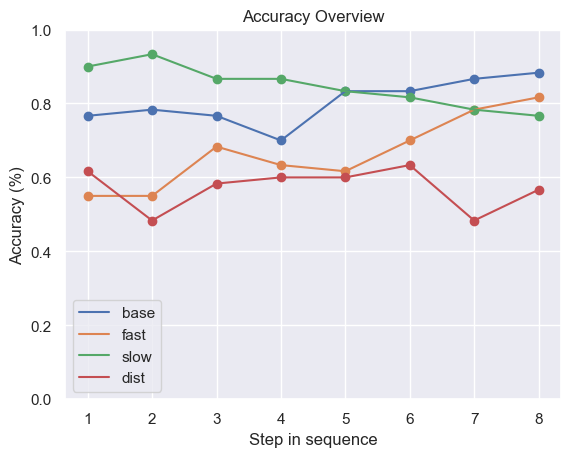

In [35]:
import seaborn as sns
sns.set_theme()

def get_bools(df):
    lister = []
    for i in range(len(df)):
        true_list = np.isin(np.array(df["shown_words"][i].split(",")), np.array(df["recalled_words"][i].split(","))).astype(np.int32)
        lister.append(true_list)

    lister = np.array(lister)
    return lister

labels = ["base", "fast", "slow", "dist"]
tests = [base, fast, slow, dist]
for i, test in enumerate(tests):
    plt.plot(range(1,9),get_bools(test).mean(0), label=labels[i])
plt.legend()
plt.title("Accuracy Overview")
plt.xlabel("Step in sequence")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 1)
plt.scatter(range(1,9),get_bools(base).mean(0), label="base")
plt.scatter(range(1,9),get_bools(fast).mean(0), label="fast")
plt.scatter(range(1,9),get_bools(slow).mean(0), label="slow")
plt.scatter(range(1,9),get_bools(dist).mean(0), label="dist")

print(f'Average accuracy for step 1 and 8: {get_bools(base)[:,0].mean()*100:.1f}% and {get_bools(base)[:,-1].mean()*100:.1f}%')

# stat test for difference in proportion recalled at step 1 and 8
from statsmodels.stats.proportion import proportions_ztest
count = np.array([get_bools(base)[:,0].sum(), get_bools(base)[:,-1].sum()])
nobs = np.array([get_bools(base).shape[0], get_bools(base).shape[0]])
stat, pval = proportions_ztest(count, nobs)
print(f'Proportion z-test for step 1 vs step 8: z={stat:.2f}, p={pval:.4f}')

In [ ]:
# Statistical testing paired t-test between base and fast
from scipy import stats
t_stat, p_val = stats.ttest_rel(get_bools(base).mean(1), get_bools(fast).mean(1))
print(f'Paired t-test between base and fast: t={t_stat:.3f}, p={p_val}')
# Statistical testing paired t-test between base and slow
t_stat, p_val = stats.ttest_rel(get_bools(base).mean(1), get_bools(slow).mean(1))
print(f'Paired t-test between base and slow: t={t_stat:.3f}, p={p_val:.3f}')
# Statistical testing paired t-test between base and dist
t_stat, p_val = stats.ttest_rel(get_bools(base).mean(1), get_bools(dist).mean(1))
print(f'Paired t-test between base and dist: t={t_stat:.3f}, p={p_val}')   


# independent t-test between fast and slow
t_stat, p_val = stats.ttest_ind(get_bools(base).mean(1), get_bools(fast).mean(1))
print(f'Independent t-test between base and fast: t={t_stat:.3f}, p={p_val}')   
# independent t-test between fast and dist
t_stat, p_val = stats.ttest_ind(get_bools(base).mean(1), get_bools(slow).mean(1))
print(f'Independent t-test between base and slow: t={t_stat:.3f}, p={p_val:.3f}')   
# independent t-test between slow and dist
t_stat, p_val = stats.ttest_ind(get_bools(base).mean(1), get_bools(dist).mean(1))
print(f'Independent t-test between base and dist: t={t_stat:.3f}, p={p_val}')
if p_val < 0.05:
    print("Significant difference found")

Paired t-test between base and fast: t=5.217, p=2.4628886282650497e-06
Paired t-test between base and slow: t=-1.542, p=0.128
Paired t-test between base and dist: t=8.167, p=2.8575765488806047e-11
Independent t-test between base and fast: t=4.932, p=2.6880977581368037e-06
Independent t-test between base and slow: t=-1.384, p=0.169
Independent t-test between base and dist: t=7.904, p=1.594367912187254e-12
Significant difference found


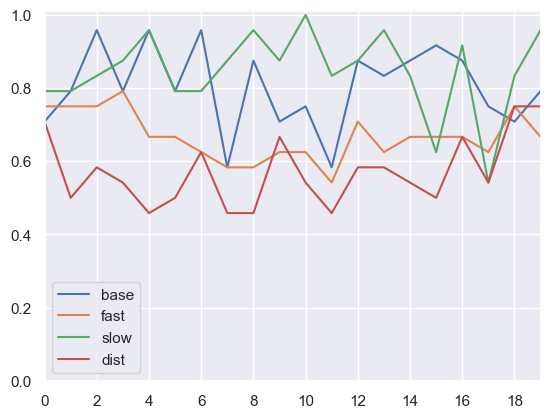

In [14]:
labels = ["base", "fast", "slow", "dist"]
tests = [base, fast, slow, dist]
for i, test in enumerate(tests):
    plt.plot(get_bools(test).reshape((-1,20,8)).mean((0,2)), label=labels[i])
plt.legend()
plt.ylim(0, 1.01)
plt.xlim(0,19)
plt.xticks(range(20)[::2]);

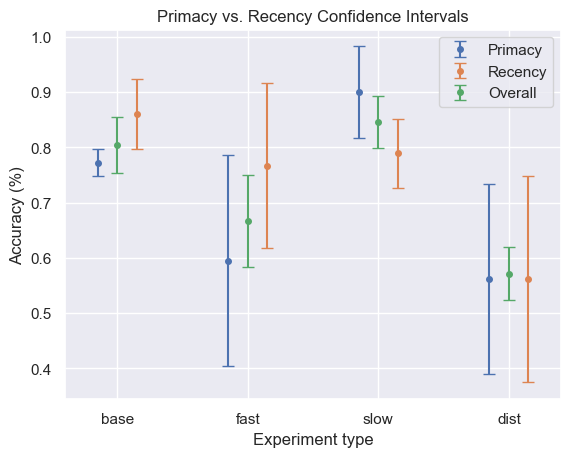

In [15]:
import numpy as np
from scipy import stats

def conf(data, total_guesses_per_round):
    n_rounds = len(data)
    proportions = data / total_guesses_per_round
    mean_prop = np.mean(proportions)
    std_prop = np.std(proportions, ddof=1)

    alpha = 0.05
    t_crit = stats.t.ppf(1 - alpha/2, df=n_rounds-1)
    margin = t_crit * (std_prop / np.sqrt(n_rounds))
    
    return mean_prop, margin

means = []
margins = []

for data in tests:
    m, margin = conf(get_bools(data).sum(0)[:3], 60)
    means.append(m)
    margins.append(margin)

means2 = []
margins2 = []

for data in tests:
    m, margin = conf(get_bools(data).sum(0)[-3:], 60)
    means2.append(m)
    margins2.append(margin)


means_over = []
margins_over = []

for data in tests:
    m, margin = conf(get_bools(data).sum(0), 60)
    means_over.append(m)
    margins_over.append(margin)

import seaborn as sns
sns.set_theme()
x = np.arange(len(means))
spacing = 1/(len(x)+1)
plt.errorbar(x-0.15, means, yerr=margins, fmt='o', markersize=4, capsize=4, label="Primacy")
plt.errorbar(x+0.15, means2, yerr=margins2, fmt='o', markersize=4, capsize=4, label="Recency")
plt.errorbar(x, means_over, yerr=margins_over, fmt='o', markersize=4, capsize=4, label="Overall")
plt.grid()
plt.xlim(-2*spacing, len(x)-1+2*spacing)
plt.xticks(x, labels)
plt.title("Primacy vs. Recency Confidence Intervals")
plt.xlabel("Experiment type")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid()
# plt.ylim(0, 1)

In [16]:
(np.array(means) - np.array(means2)).round(2) * 100

array([ -9., -17.,  11.,   0.])